<a href="https://colab.research.google.com/github/NelsonKamau/Goodreads-Books-Review-Rating-Prediction/blob/main/Simple_EDA_and_Interactive_Plots_using_Goodreads_Books_Review_Rating_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing**

In [4]:
# Drive import
from google.colab import drive

# Basic Imports
import pandas as pd
import numpy as np

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Colab Notebooks/Goodreads Rating prediction/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Goodreads Rating prediction


In [7]:
# Load and view the training data
train_df = pd.read_csv('goodreads_train.csv')
train_df.sample(5, random_state=42)

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
527984,2fb9a15c821488faf58f15d9f2fe96f2,140079,d8277f19d4b894e3c6d095f40521d719,4,I'm proudly telling you that I'm a big fan of ...,Sat Apr 09 05:52:45 -0700 2011,Mon Apr 25 08:46:47 -0700 2011,Sat Apr 09 00:00:00 -0700 2011,NaN,0,0
618093,7d2b7728c429ad7b4454ac69ddb2284c,9520360,3a192a0cb34b52f557c327aef5f98979,4,"4.25 stars \n This was so, so much better than...",Wed Mar 23 14:17:52 -0700 2016,Sat Apr 02 03:51:04 -0700 2016,Thu Mar 24 13:27:04 -0700 2016,Wed Mar 23 00:00:00 -0700 2016,3,0
484217,5e6727497b317e459c0acb0eabf93870,11737387,5a85753eabd683a83d6197be52a2dfe5,3,For some reason finding a good male lead urban...,Thu Nov 14 11:59:22 -0800 2013,Tue Jul 22 12:06:38 -0700 2014,Wed Feb 12 14:02:29 -0800 2014,Wed Feb 05 00:00:00 -0800 2014,1,0
161123,53573268e15260bce9b063fc31ccd3ad,12814333,f114ce512067e7c72fec467f5ddf090a,4,It's about the son of a pepper merchant who fi...,Wed Jul 24 18:38:02 -0700 2013,Tue May 20 14:10:04 -0700 2014,Tue Jul 30 00:00:00 -0700 2013,Wed Jul 24 00:00:00 -0700 2013,0,0
718642,02651037306c57971dea2f24ec9be70f,6339664,b31cfd93d8e3c1ad288f663f282b7a70,4,the most beautiful display of emotions in this...,Wed Oct 22 07:51:25 -0700 2014,Fri Sep 25 06:11:45 -0700 2015,Mon Dec 22 06:26:43 -0800 2014,Sun Dec 07 00:00:00 -0800 2014,0,0


In [8]:
# Load and view the testing data
test_df = pd.read_csv('goodreads_test.csv')
test_df.sample(5, random_state=42)

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
457380,f2f0882cdf4484cef095f52db7ac5fe6,13505530,4409fc3cf832186a6d00d01169607e7d,One of my all-time favorite series. \n 2016 re...,Fri Jun 15 21:48:29 -0700 2012,Mon Jun 12 00:52:47 -0700 2017,Mon Jun 12 00:52:47 -0700 2017,Sun Jun 11 00:00:00 -0700 2017,0,0
10373,16da1f7b07df2e6c5880e3082097ba79,7263429,64ea817c28c38567d64cfa7a08252250,The storyline was MUCH more detailed in this b...,Sun Aug 14 18:14:21 -0700 2011,Sun Aug 28 06:35:06 -0700 2011,Sat Nov 01 00:00:00 -0700 2008,NaN,0,0
214339,722183bd328a903c8559843b11d249f5,21327,ff9ec6b9e0531a7130429832a0c087b5,It was fun getting to know some new characters.,Tue May 03 07:19:49 -0700 2016,Tue May 03 07:20:19 -0700 2016,Fri Apr 29 00:00:00 -0700 2016,NaN,0,0
165000,6c69a3e905d4cc88706609b2bc64e9f1,23242668,c2ab3f4ef087e34b94e12724c3cb3ffd,Great! This is the story of Hank and Sloan who...,Wed Feb 03 10:34:50 -0800 2016,Fri Mar 04 15:11:26 -0800 2016,Fri Mar 04 15:11:26 -0800 2016,NaN,0,0
341126,9da4109c539157bd6bee0413d97ed602,6282698,00670d4c69f4cd5a8b3fef9978713628,"Well, this was a bit of an improvement from th...",Sat May 24 06:43:54 -0700 2014,Mon Feb 29 06:24:04 -0800 2016,Tue Mar 24 06:21:40 -0700 2015,Sat Jun 28 00:00:00 -0700 2014,0,7


In [9]:
# View the shape of data
train_df.shape, test_df.shape

((900000, 11), (478033, 10))

In [17]:
# Count the unique users in train and test data
train_df['user_id'].nunique(), test_df['user_id'].nunique()

(12188, 6705)

**Finding common Users from train and test set**

In [19]:
# Check for common users in train and test data
np.intersect1d(train_df["user_id"].unique(), test_df["user_id"].unique())

array(['b9450d1c1f97f891c392b1105959b56e'], dtype=object)

**Finding unique books in train and test set**

In [20]:
# Count the unique books in train and test data
train_df['book_id'].nunique(), test_df['book_id'].nunique()

(25474, 25399)

**Finding common books from train and test set**

In [23]:
# Check for common books in train and test data
np.intersect1d(train_df['book_id'].unique(), test_df['book_id'].unique()).size

25398

**Dropping unnecessary columns from train and test set**

In [24]:
# Dropping the columns of no use
columns = ["book_id", "review_id", "date_added", "date_updated", "read_at", "started_at", "user_id", "n_votes", "n_comments"]

train_df.drop(columns = columns , inplace = True)
test_df.drop(columns = columns, inplace = True)

In [25]:
# View the new train_df
train_df.sample(5, random_state = 42)

,rating,review_text
527984,4,I'm proudly telling you that I'm a big fan of ...
618093,4,"4.25 stars \n This was so, so much better than..."
484217,3,For some reason finding a good male lead urban...
161123,4,It's about the son of a pepper merchant who fi...
718642,4,the most beautiful display of emotions in this...


In [26]:
# View the new train_df
test_df.sample(5, random_state = 42)

,review_text
457380,One of my all-time favorite series. \n 2016 re...
10373,The storyline was MUCH more detailed in this b...
214339,It was fun getting to know some new characters.
165000,Great! This is the story of Hank and Sloan who...
341126,"Well, this was a bit of an improvement from th..."


**Checking missing values in train and test set**

In [27]:
# Check for null values in our training data
train_df.isnull().sum()

rating         0
review_text    0
dtype: int64

In [28]:
# Check forl null values in our testing data
test_df.isnull().sum()

review_text    0
dtype: int64

## **Cleaning the Review Text**

**Changing text into lower case**

In [29]:
# Lowercase the review text
def to_lowercase(dat):
  data = dat.apply(lambda x: str(x).lower())

  return data

train_df['review_text'] = to_lowercase(train_df['review_text'])
test_df['review_text'] = to_lowercase(test_df['review_text'])

**Removal of Line Breaks and Extra Spcaces**

In [30]:
# Remove the line breaks and extra spaces
def remove_extras(dat):
  data = dat.apply(lambda x: " ".join(x.split()))

  return data

train_df["review_text"] = remove_extras(train_df["review_text"])
test_df["review_text"] = remove_extras(test_df["review_text"])

**Removal of Links and URL's**

In [31]:
# re for matching and replacing patterns in string
import re

def remove_patterns(dat):
  # Removing https links from the text
  data = dat.apply(
      lambda x: re.sub(
          r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', '',
          x, flags=re.MULTILINE))
  
  return data

train_df["review_text"] = remove_patterns(train_df["review_text"])
test_df["review_text"] = remove_patterns(test_df["review_text"])

**Removal of Special Characters**

In [32]:
# Remove special charaters from the review text
def remove_special(dat):
  data = dat.apply(lambda x: re.sub('\W+',' ', x))

  return data

train_df["review_text"] = remove_special(train_df["review_text"])
test_df["review_text"] = remove_special(test_df["review_text"])

**Removal of Stop words**

In [33]:
# Import nltk and download stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# Load the stop words
stop_words = list(stopwords.words('english'))

# View the count of stop_words
len(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


179

In [34]:
# Remove stop_words from reviews
def remove_stop_words(data):
  data = data.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

  return data

train_df["review_text"] = remove_stop_words(train_df["review_text"])
test_df["review_text"] = remove_stop_words(test_df["review_text"])

In [35]:
train_df.sample(5, random_state=42)

,rating,review_text
527984,4,proudly telling big fan quinn perfect gentlema...
618093,4,4 25 stars much better lost hero loved reading...
484217,3,reason finding good male lead urban fantasy qu...
161123,4,son pepper merchant finally achieves dream vis...
718642,4,beautiful display emotions book


In [36]:
test_df.sample(5, random_state=42)

,review_text
457380,one time favorite series 2016 reread liked rem...
10373,storyline much detailed book however much ren ...
214339,fun getting know new characters
165000,great story hank sloan charged planning best c...
341126,well bit improvement first book care mercy eno...


# **Visualization**

In [37]:
# Wordcloud for text visualization - most used words throughout all reviews
from wordcloud import WordCloud

# Matplotlib for plotting
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    # Initialize the wordcloud
    wordcloud = WordCloud(
        colormap            = "Spectral",
        scale               = 3,
        random_state        = 1
    ).generate(str(data))

    # Customize the wordcloud plot
    fig = plt.figure(1, figsize = (16, 16))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    # Plot and display the wordcloud
    plt.imshow(wordcloud)
    plt.show()

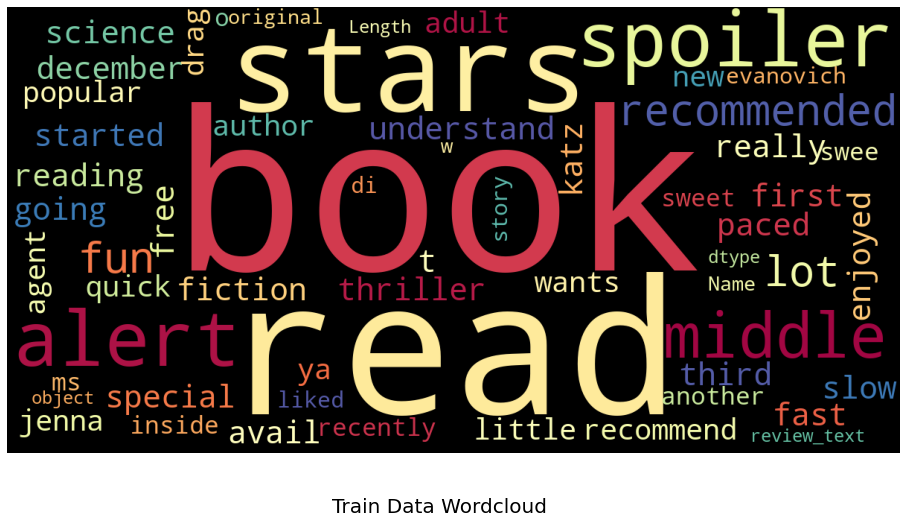

In [38]:
# Train data word cloud
show_wordcloud(train_df["review_text"], title = "Train Data Wordcloud")

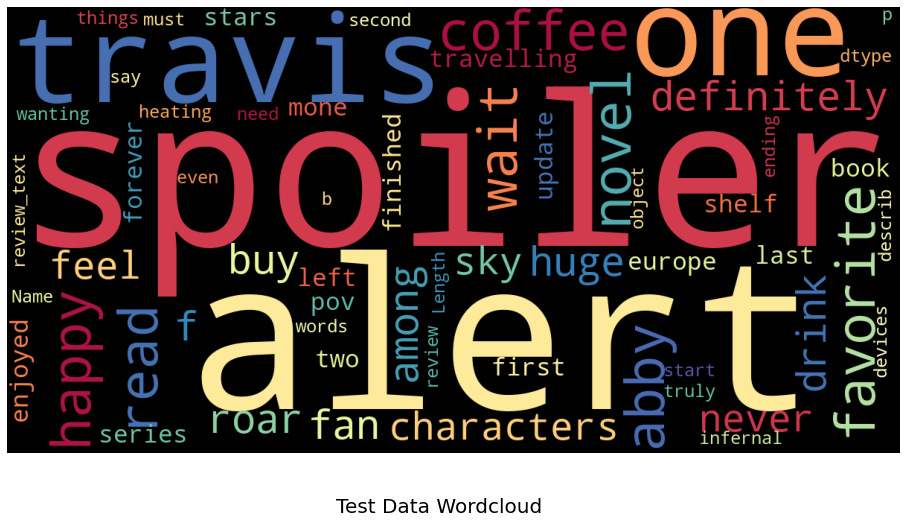

In [39]:
# Test data word cloud
show_wordcloud(test_df["review_text"], title = "Test Data Wordcloud")

In [40]:
# Import Plotly for plots
import plotly.express as px
import plotly.graph_objects as go

# HTML to display the plotly chart
from IPython.core.display import HTML

In [41]:
# Importing the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Function to get frequency of words
def get_top_n_words(corpus, n = None, ngram_range = (1, 1)):

    # CountVectorize the text
    vec = CountVectorizer(stop_words = 'english', ngram_range = ngram_range).fit(corpus)

    # Create the bag_of_words 
    bag_of_words = vec.transform(corpus)

    # Get the sum of the count of words
    sum_words = bag_of_words.sum(axis = 0)

    # Get the word frequency of each word
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    # Sort the words by the frequencey
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

    # Return first n words
    return words_freq[:n]

In [42]:
# Function to plot the top n words by frequency
def get_frequency_count_plot(df, title, n = 20, ngram_range = (1, 1)):
    
    # Get top 20 words from data
    common_words = get_top_n_words(df['review_text'], n, ngram_range)

    # Create a dataframe of top n words
    temp_df = pd.DataFrame(common_words, columns = ['review_text' , 'count'])
    temp_df = temp_df.groupby('review_text').sum()['count'].sort_values(ascending = False)
        
    # Create plotly figure bar plot to display data
    fig = go.Figure([
        go.Bar(x = temp_df.keys(), y = temp_df.values)
    ])
    
    # Customize the figure
    fig.update_layout(
        title = title,
        xaxis_title = "Word",
        yaxis_title = "Count",
        width = 1000,
        height = 600,
    )
    fig.update_xaxes(tickangle = 90)
    
    return fig

In [43]:
# Top 20 words - unigrams from train data
get_frequency_count_plot(df = train_df, title = "Top 20 words - unigrams - Train Data", n = 20, ngram_range = (1, 1))

In [44]:
# Top 20 words - unigrams from test data
get_frequency_count_plot(df = test_df, title = "Top 20 words - unigrams - Test Data", n = 20, ngram_range = (1, 1))

In [45]:
# Top 20 words - bigram from train data
get_frequency_count_plot(df = train_df, title = "Top 20 words - bigram - Train Data", n = 20, ngram_range = (2, 2))

In [46]:
# Top 20 words - bigram from test data
get_frequency_count_plot(df = test_df, title = "Top 20 words - bigram - Test Data", n = 20, ngram_range = (2, 2))

In [ ]:
# Import gc to free memory
import gc

# Delete variables
del stop_words, stopwords

# Clear the memory
gc.collect()